<a href="https://colab.research.google.com/github/utsha95/Adaboost-p-o/blob/main/Adaboost_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier  # <- Import AdaBoostClassifier here
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Mount with google drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [29]:
# Load datasets
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Student_Response.csv')

In [30]:
# Step 1: Clean the dataset by removing unnecessary columns
drop_columns = ['Timestamp', 'Name', 'DOB', 'Father\'s job']
df_clean = df.drop(columns=drop_columns)

In [31]:
# Step 2: Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in df_clean.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column].astype(str))
    label_encoders[column] = le

In [32]:
# Step 3: Define features (X) and target (y)
# Assuming 'Problem Solving' is the target variable
X = df_clean.drop('Problem Solving', axis=1)
y = df_clean['Problem Solving']


In [33]:
# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [34]:
# Step 5: Create and train AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)


AdaBoostClassifier(random_state=42)

In [35]:
# Step 6: Predict on test data
y_pred = ada_model.predict(X_test)

In [36]:
# Step 7: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[25  3  5]
 [11  0  4]
 [10  0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.76      0.63        33
           1       0.00      0.00      0.00        15
           2       0.68      0.66      0.67        29

    accuracy                           0.57        77
   macro avg       0.41      0.47      0.43        77
weighted avg       0.49      0.57      0.52        77



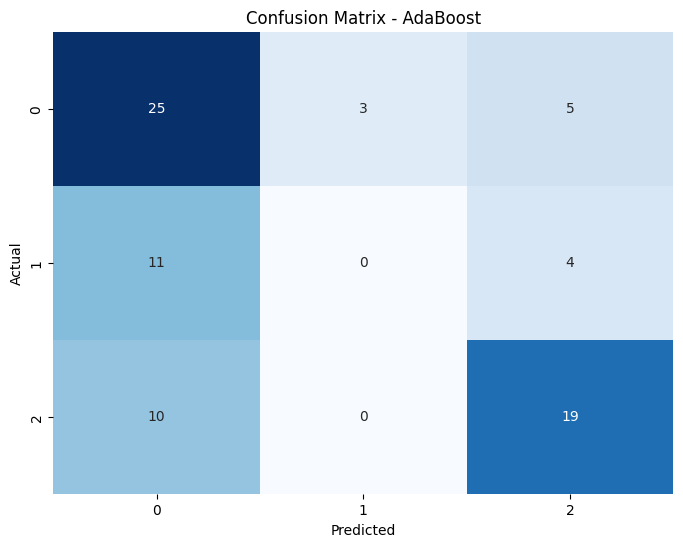

In [37]:
# Step 8: Visualization

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

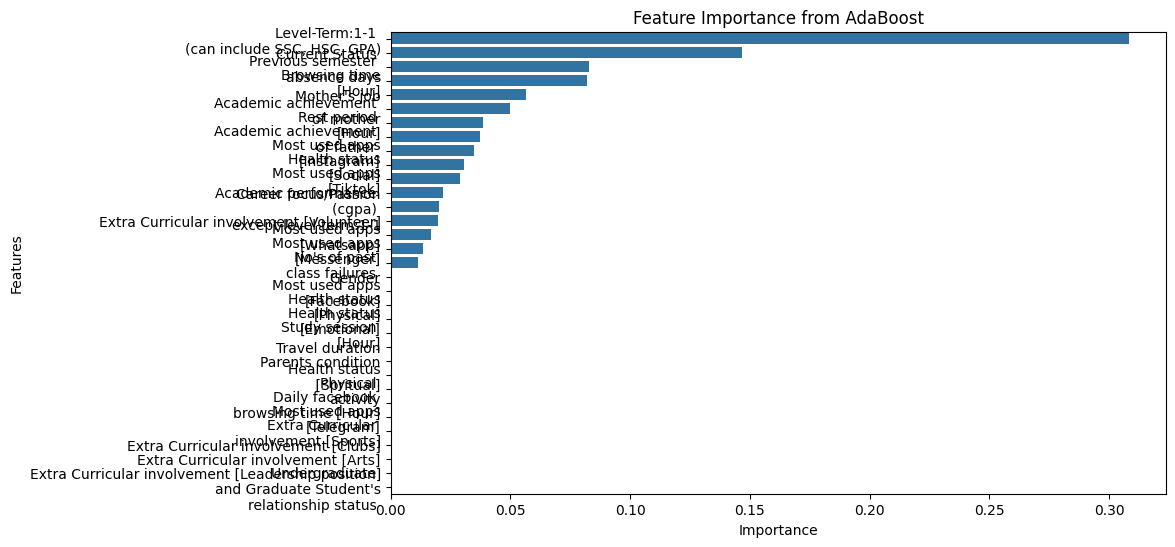

In [38]:
# Feature importance visualization
feature_importances = pd.Series(ada_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance from AdaBoost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()